In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("/Users/Manan/car price/car data.csv")
df.head(7)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0


In [3]:
df.shape   #So there are 301 rows and 9 columns

(301, 9)

In [4]:
df.info()   #Profiling of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [5]:
df.describe()   #Basic Statistics of data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Checking null values in dataset
df.isnull().sum()   #so it seems like we do not have any null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Let's check the unique values
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())   

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [8]:
#Let's drop Car Name, as it is of no use in prediction
df =df.drop(labels=["Car_Name"],axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [10]:
#Let's make one column of current year =2020
df['Current Year']=2020

In [20]:
#To get the total years the car was used by previous owner = "No_of_year"
df['No_of_year']=df['Current Year'] - df['Year']

In [21]:
#Now let's drop Year and Current Year as now it is of no use
df = df.drop(labels=['Year','Current Year'],axis=1)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [22]:
#Outliers will not effect the model as we will be using Ensemble algorithms for predictions

In [24]:
#Now let's convert Categorical features to continous features using One Hot encoding
df=pd.get_dummies(df,drop_first=True)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [26]:
#Checking Correlation
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# Exploratory Data Analysis

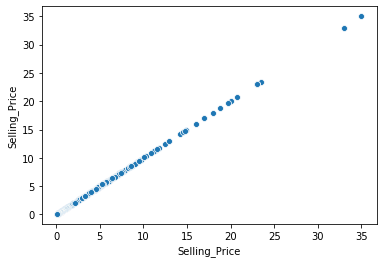

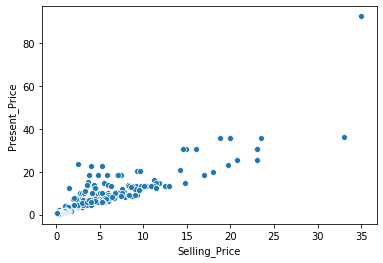

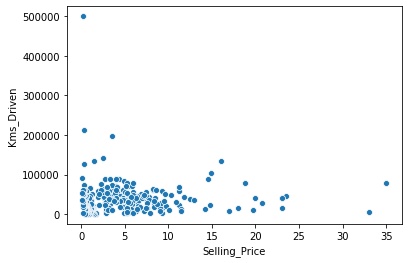

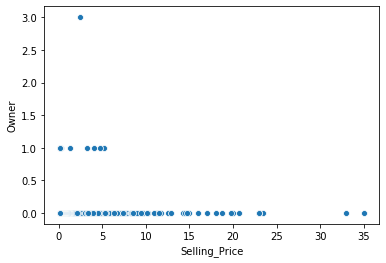

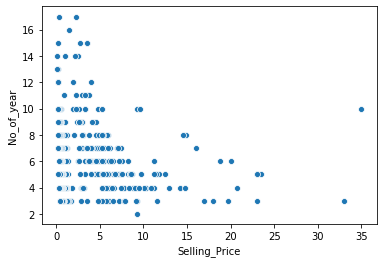

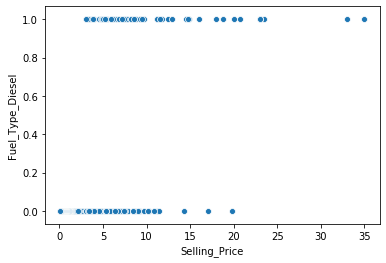

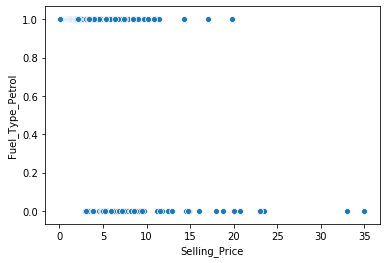

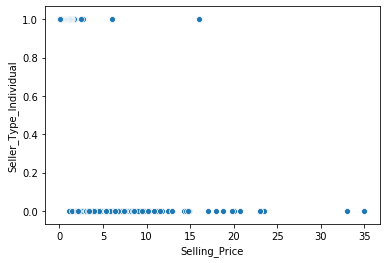

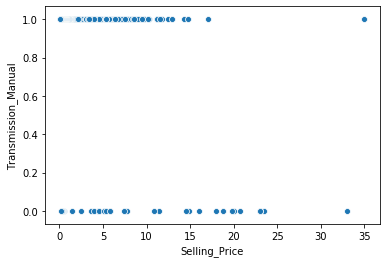

In [27]:
for i in df.columns:
    if df[i].dtypes != "object":
        sb.scatterplot(df['Selling_Price'],df[i])     #Hence the features with Selling Price has non linear relationship
        plt.show()

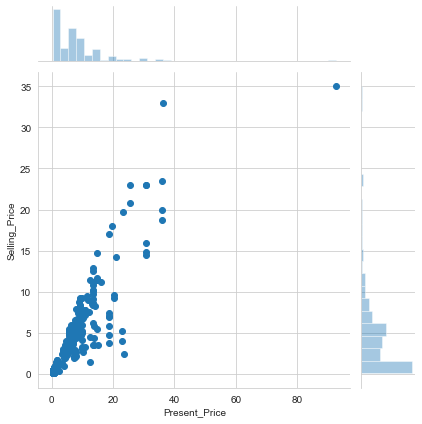

In [73]:
sb.set_style('whitegrid')
sb.jointplot(x='Present_Price',y='Selling_Price',data=df)

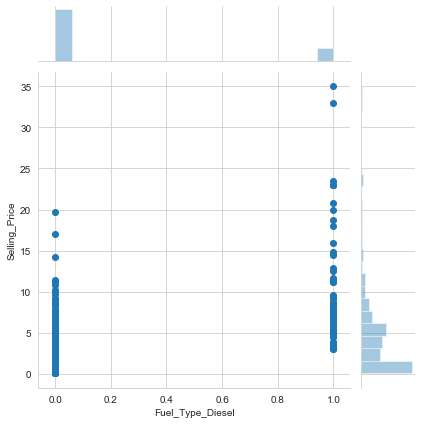

In [74]:
sb.set_style('whitegrid')
sb.jointplot(x='Fuel_Type_Diesel',y='Selling_Price',data=df)

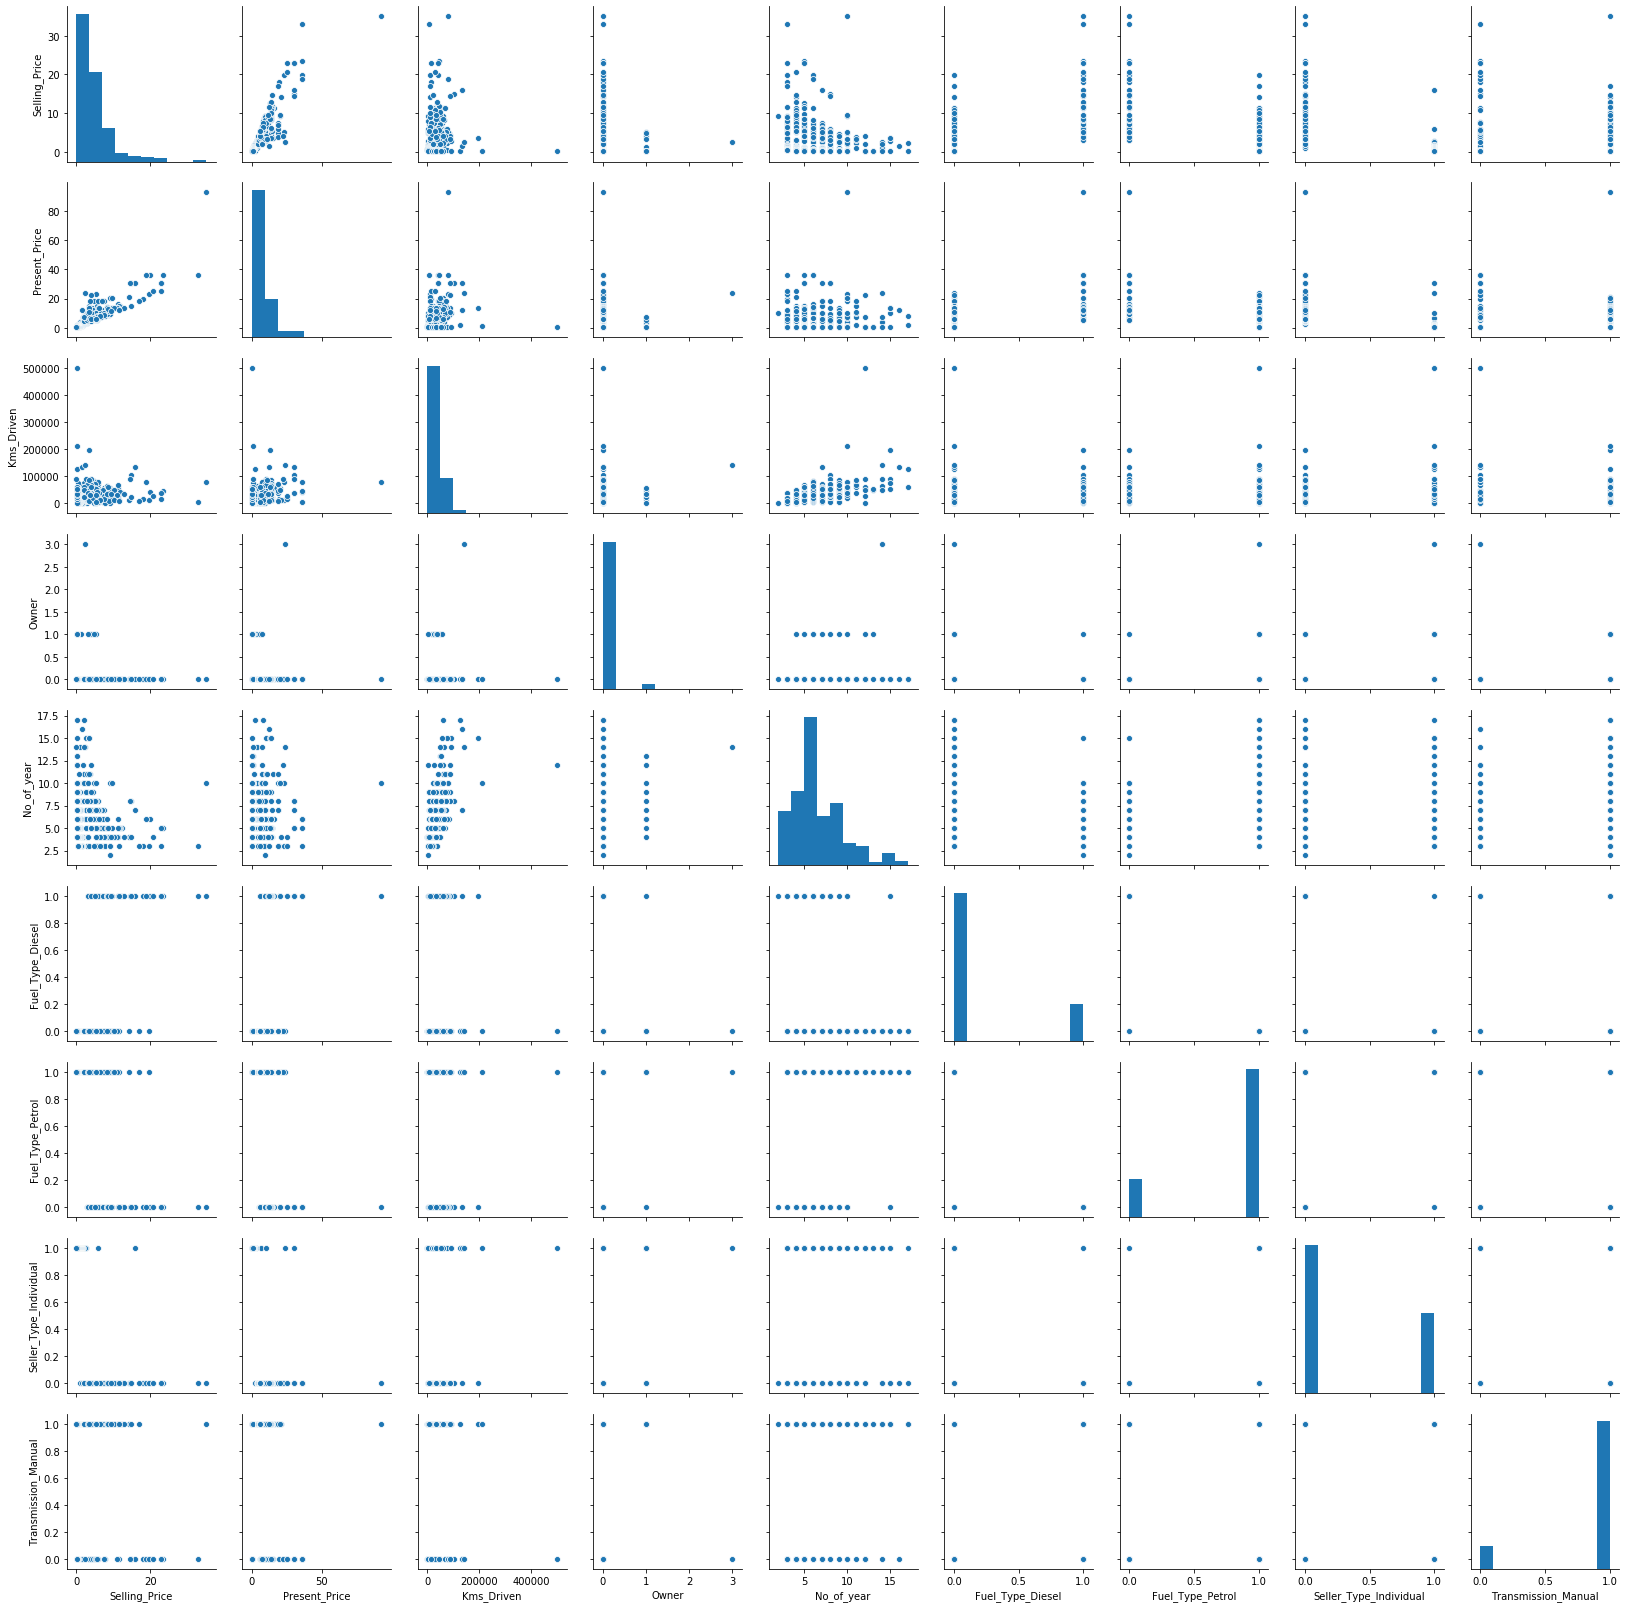

In [29]:
sb.pairplot(data=df,palette="bright")

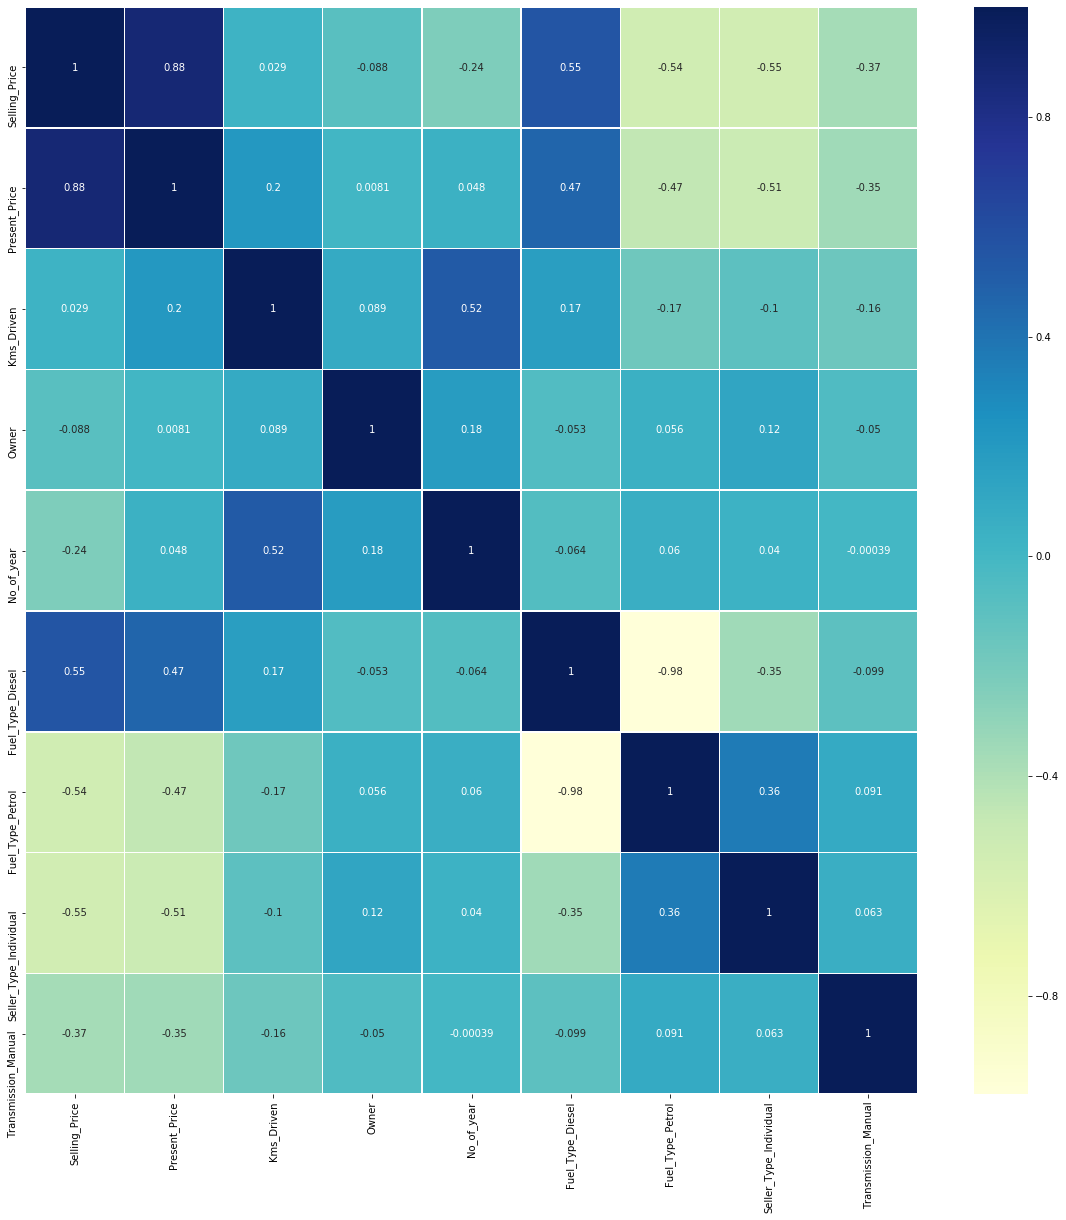

In [32]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=.5)

# Model Preparation

In [33]:
X = df.drop(labels=['Selling_Price'],axis=1)
Y = df[['Selling_Price']]

In [34]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


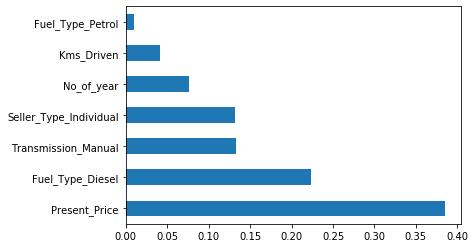

In [35]:
#Let's check the feature importance using Extra Tree regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [36]:
#So Present Price, Diesel fuel type and Transmission manual are top 3 features to predict selling price

In [37]:
#Spillting data into training and testing set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

# Because it(Selling_Price) has non linear relationship with other features, we will use Decision Tree regressor and Random Forest Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)

In [68]:
model_dtr=dtr.fit(xtrain,ytrain)
predicted = model_dtr.predict(xtest)

In [69]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest, predicted))
print('MSE:', metrics.mean_squared_error(ytest, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predicted)))
print('r2 score:',metrics.r2_score(ytest,predicted))

MAE: 0.7365573770491803
MSE: 1.5370344262295086
RMSE: 1.2397719250852184
r2 score: 0.9391931378339757


In [42]:
#Now using Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Hyperparameter Tuning with RandomizedSearchCV

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1400, num = 14)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 7, 10, 25, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [46]:
#Create the random grid
random_params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 7, 10, 25, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [48]:
rf1 = RandomizedSearchCV(estimator = rf, param_distributions = random_params,scoring='neg_mean_squared_error', n_iter = 10, cv = 4,random_state=42)

In [49]:
#Fitting the training data
rf1.fit(xtrain,ytrain)

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 7, 10, 25,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400]},
                   random_state=42, scoring='neg_mean_squared_error')

# Model Evaluation

In [50]:
rf1.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 25}

In [51]:
rf1.best_score_

-2.763166769172611

In [52]:
prediction=rf1.predict(xtest)

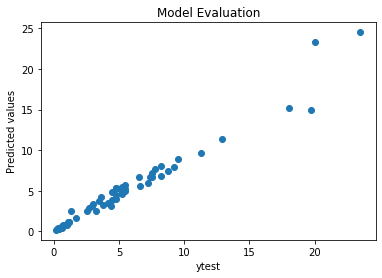

In [54]:
plt.xlabel("ytest")
plt.ylabel("Predicted values")
plt.title("Model Evaluation")
plt.scatter(ytest,prediction)

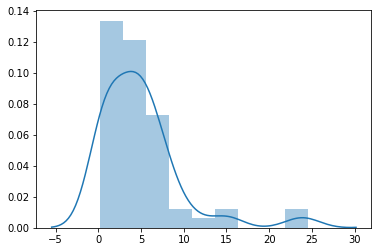

In [56]:
sb.distplot(prediction)

Text(0.5, 1.0, 'Predictions')

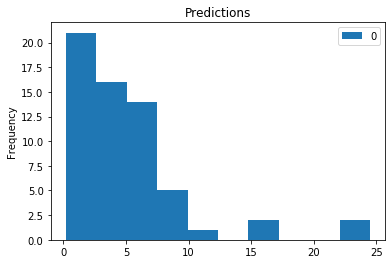

In [62]:
pred_Df=pd.DataFrame(prediction)
pred_Df.plot(kind='hist')
plt.title('Predictions')

Text(0.5, 1.0, 'True Values')

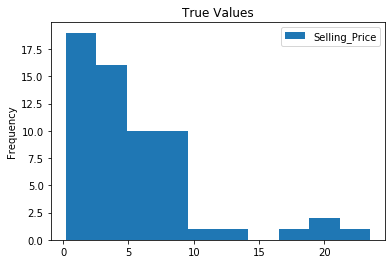

In [63]:
ytest.plot(kind='hist')
plt.title("True Values")

In [66]:
print('MAE:', metrics.mean_absolute_error(ytest, prediction))
print('MSE:', metrics.mean_squared_error(ytest, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, prediction)))
print("R2 Score : ",metrics.r2_score(ytest, prediction))

MAE: 0.6082765807962525
MSE: 1.0741962060321337
RMSE: 1.0364343713097004
R2 Score :  0.9575035539056241


In [70]:
# So random forest regressor has 95% accuracy

In [72]:
import pickle
pickle.dump(rf1,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))